In [ ]:
# 토픽 모델링 - 20 뉴스그룹

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=42)

count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',
                             ngram_range=(1, 2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[2.84969355e+02, 1.82741674e+02, 7.44561411e+01, ...,
        9.58783824e+00, 1.19929132e+02, 6.30958337e+01],
       [1.25085023e-01, 4.74393664e+00, 1.25049407e-01, ...,
        2.82363151e+02, 1.25101274e-01, 6.75947204e+01],
       [1.17111450e+02, 1.25040770e-01, 9.61897939e+01, ...,
        1.25104152e-01, 2.62881154e+01, 1.25029330e-01],
       ...,
       [3.29431245e+01, 1.85323621e+01, 1.16934909e+01, ...,
        2.13409938e+01, 6.07878793e+00, 1.45410651e+01],
       [1.25063053e-01, 1.25140852e-01, 1.25003472e-01, ...,
        1.05279458e+02, 1.25088354e-01, 6.75254413e+01],
       [1.25129628e-01, 5.73185922e-01, 1.25189046e-01, ...,
        5.17057874e+01, 1.25024221e-01, 1.25058221e-01]])

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

feature_names = count_vect.get_feature_names_out()

display_topics(lda, feature_names, 15)

Topic # 0
10 year medical 1993 health 20 12 disease cancer patients research new 00 number 11
Topic # 1
don just like know think good time ve way people really does ll right going
Topic # 2
image file jpeg output program gif color images format files use entry bit 03 version
Topic # 3
armenian armenians turkish people said turkey armenia government genocide turks muslim russian greek killed azerbaijan
Topic # 4
israel jews jewish dos israeli dos dos arab state ed arabs people university palestinian adl anti
Topic # 5
edu com graphics available ftp window software use data mail version motif server pub information
Topic # 6
god people jesus church believe say christ does christian think know christians did bible said
Topic # 7
thanks use does know using like help ve need bike problem advance hi work display


In [ ]:
# 문서 군집화 소개와 실습

In [43]:
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 700)

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Euron/Data/OpinosisDataset1.0/topics'

all_files = glob.glob(os.path.join(path, "*.data"))

filename_list = []
opinion_text = []

for file_ in all_files:
    try:
        with open(file_, 'r', encoding='latin1') as f:
            text = f.read()

        filename = os.path.basename(file_)
        filename = os.path.splitext(filename)[0]

        filename_list.append(filename)
        opinion_text.append(text)
    except Exception as e:
        print(f"파일 {file_} 읽기 실패: {e}")

document_df = pd.DataFrame({
    'filename': filename_list,
    'opinion_text': opinion_text
})

document_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,filename,opinion_text
0,room_holiday_inn_london.txt,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave us a candy bar and two bottlets of water whic is a very nice touch .\n We had a room with two double beds which was surprisingly roomy, considering the small hotel rooms I have in previous trips to London .\nThe room was quiet, clean, the bed and pillows were comfortable, and the service was adequate .\n We arrived about 11 am, room was ready .\n Room was good size for Europe , clean throughout .\n The Co..."
1,parking_bestwestern_hotel_sfo.txt,"Parking was expensive but I think this is common for San Fran .\n there is a fee for parking but well worth it seeing no where to park if you do have a car .\n The parking was free, which was great, and the hotel was conveniently located for public transport, and local attractions .\nAs for in, and, out parking, I have seen a lot of San Francisco with no car at all .\n They have a parking garage, but they make you leave your vehicle for them to park and then if you want to take a drive later, you have to wait for the staff to get it .\n There is no real parking space, so I had to pull up in front of the hotel in a small space .\nThere was valet parking at a cost of $42 .\n Rooms are v..."
2,performance_honda_accord_2008.txt,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n Overall performance is good but comfort level is poor .\n I'm impressed with the performance as well as efficiency gains .\n It has room, performance, good MPG for its size and excellent reliability .\n For the record I test, drove the Lexus350 the BMW 5 series, the infiniti G35 and enjoyed the Honda performance equally for far less money !\n Very happy with the car enjoy the ride and performance .\n The performance of the engine is very smooth .\n This car had rattles at 500 miles and has horrib..."
3,free_bestwestern_hotel_sfo.txt,"The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n The service was good, very friendly staff and we loved the free wine reception each night .\n has free wireless and help you with transportation needs .\n The nightly free wine tasting from 5 , 6 pm is a brilliant idea and gets guests together to socialise witheach other .\n They have a happy hour where you have a couple offree drinks bet..."
4,speed_windows7.txt,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n, faster about 20% to 30% faster at running applications than my Vista , seriously\n Yes, it'll make your computer run a bit slower but\n, Fast startup and performance\n Also, in my non, benchmarked experience, Windows 7 has been at least as fast as XP if not faster .\n It's fast, secure, stable, visually appealing and fun to use .\n For these two computers, normal use is pretty fast, , not quite as fast as Windows XP SP3, but very close .\nIt loads blazing fast, software runs smooth a..."


In [58]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def LemNormalize(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(
    tokenizer=LemNormalize,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=0.05,
    max_df=0.85
)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [64]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [65]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,room_holiday_inn_london.txt,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave us a candy bar and two bottlets of water whic is a very nice touch .\n We had a room with two double beds which was surprisingly roomy, considering the small hotel rooms I have in previous trips to London .\nThe room was quiet, clean, the bed and pillows were comfortable, and the service was adequate .\n We arrived about 11 am, room was ready .\n Room was good size for Europe , clean throughout .\n The Co...",1
1,parking_bestwestern_hotel_sfo.txt,"Parking was expensive but I think this is common for San Fran .\n there is a fee for parking but well worth it seeing no where to park if you do have a car .\n The parking was free, which was great, and the hotel was conveniently located for public transport, and local attractions .\nAs for in, and, out parking, I have seen a lot of San Francisco with no car at all .\n They have a parking garage, but they make you leave your vehicle for them to park and then if you want to take a drive later, you have to wait for the staff to get it .\n There is no real parking space, so I had to pull up in front of the hotel in a small space .\nThere was valet parking at a cost of $42 .\n Rooms are v...",1
2,performance_honda_accord_2008.txt,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n Overall performance is good but comfort level is poor .\n I'm impressed with the performance as well as efficiency gains .\n It has room, performance, good MPG for its size and excellent reliability .\n For the record I test, drove the Lexus350 the BMW 5 series, the infiniti G35 and enjoyed the Honda performance equally for far less money !\n Very happy with the car enjoy the ride and performance .\n The performance of the engine is very smooth .\n This car had rattles at 500 miles and has horrib...",0
3,free_bestwestern_hotel_sfo.txt,"The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n The service was good, very friendly staff and we loved the free wine reception each night .\n has free wireless and help you with transportation needs .\n The nightly free wine tasting from 5 , 6 pm is a brilliant idea and gets guests together to socialise witheach other .\n They have a happy hour where you have a couple offree drinks bet...",1
4,speed_windows7.txt,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n, faster about 20% to 30% faster at running applications than my Vista , seriously\n Yes, it'll make your computer run a bit slower but\n, Fast startup and performance\n Also, in my non, benchmarked experience, Windows 7 has been at least as fast as XP if not faster .\n It's fast, secure, stable, visually appealing and fun to use .\n For these two computers, normal use is pretty fast, , not quite as fast as Windows XP SP3, but very close .\nIt loads blazing fast, software runs smooth a...",4


In [66]:
document_df[document_df['cluster_label'] == 0].sort_values(by='filename')

,filename,opinion_text,cluster_label
31,comfort_honda_accord_2008.txt,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n It's very comfortable, remarkably large inside and just an overall great vehicle .\n Front seats are very uncomfortable .\n I'm 6' tall, and find the driving position pretty comfortable .\n However, there are a couple of things that kill it for me 1 terrible driver seat comfort, kills my back 2 lack luster interior design, my Acadia has much better comfort 3 the VCM drives me crazy because the constant change in cylinder use is perceptible enough to be an annoyance .\n The seats are extremely uncomfortable .\n While the Accord is no Acura it is a close relative in terms of quality and comfort .\n ...",0
16,comfort_toyota_camry_2007.txt,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n Great gas mileage and comfortable on long trips .\n Good gas mileage, comfortable seating, lots of leg room .\n Lots of comfort for the price .\n The ride is loud and not comfortable .\n I drive 2 hours to work each day and it is just not comfortable to me .\n Getting about 26 mpg mixed city hwy with conservative driving, seating 4 people comfortably .\n The ride is quiet and comfortable .\n Styling is bland, the engine isn't strong at all, and the car doesn't deliver goo...",0
48,gas_mileage_toyota_camry_2007.txt,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n It gets great gas mileage .\n Being a mother who drives a lot I wanted a safe vehicle with good gas mileage and this car delivered that and more .\n Great gas mileage and comfortable on long trips .\n Nice looking car and good gas mileage .\n Good gas mileage, comfortable seating, lots of leg room .\n The interior is roomy, the ride is smooth and solid and yet it has excellent gas mileage .\n The gas mileage is still good, cant give specifics but for a V6, its good .\n I had my OEM Turanzas wear out at 14K and was lucky to get local Bridgestones to gimme a mileage warranty adjustment, got new tir...",0
11,interior_honda_accord_2008.txt,"I love the new body style and the interior is a simple pleasure except for the center dash .\n However, there are a couple of things that kill it for me 1 terrible driver seat comfort, kills my back 2 lack luster interior design, my Acadia has much better comfort 3 the VCM drives me crazy because the constant change in cylinder use is perceptible enough to be an annoyance .\n Love the interior and the power and speed, but not hard to beat after what I had .\n Love the interior and exterior look, the V6 is sensational, and getting compliments on the steel metallic color as if it's a Lexus or BMW .\n The seats are decent, the interior design is excellent IMO as well as the exterior design...",0
30,interior_toyota_camry_2007.txt,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windshield .\n Insanely cheap plastic all over interior .\n Disappointed in interior and exterior quality .\n I love the color of the exterior and interior .\nThis car is nearly perfect when compared to other cars in this class regarding interior dimensions, visibility, exterior styling, etc .\n Several parts in the interior rattle including the sunroof and some parts of the dash, the radio ra...",0
9,mileage_honda_accord_2008.txt,"It's quiet, get good gas mileage and looks clean inside and out .\n The mileage is great, and I've had to get used to stopping less for gas .\n Thought gas mileage would be better .\nThere are trade offs that I have no problems with, my mileage after 

In [67]:
document_df[document_df['cluster_label'] == 1].sort_values(by='filename')

,filename,opinion_text,cluster_label
18,bathroom_bestwestern_hotel_sfo.txt,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n Large comfortable room, wonderful bathroom .\n The rooms were nice, very comfy bed and very clean bathroom .\n Bathroom was spacious too and very clean .\n The bathroom only had a single sink, but it was very large .\n The room was a standard but nice motel room like any other, bathroom seemed upgraded if I remember .\nThe room was quite small but perfectly formed with a super bathroom .\n You could eat off the bathroom floor it was so clean .\n The ba...",1
29,food_holiday_inn_london.txt,"The room was packed to capacity with queues at the food buffets .\n The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n There are a couple pubs, a great patisserie and even fast food restaurants within a block .\nThe neighborhood is an upscale residential area full of restaurants in easy walking distance ranging from fast food to up, scale with a wide variety of cuisines , , we never had a bad meal .\nThe food was wonderful, a selection of sandwiches, salads, cous cous and spicy wedge potato's, fruit salad and a cake was a good fill up when needed .\nFull ...",1
25,food_swissotel_chicago.txt,"The food for our event was delicious .\n The food in the lounge was great and very fresh, , , salads, sandwiches etc .\n As far as food, walk a few blocks toward Michigan Ave turn left or right and there are plently of less expensive places to eat .\n The Palm resturant in the hotel had some specials Sunday night, we ate there and the food service,etc were outstanding portions are large and we shared since we are not big eaters .\n Took the charge of the minibar which we had used to keep my 2 year old sons food .\n We never ate anything onsite so I can't vouch for the food options immediately avialable .\n The Lobby bar does not serve food very late at night and we couldn't find any ven...",1
3,free_bestwestern_hotel_sfo.txt,"The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n The service was good, very friendly staff and we loved the free wine reception each night .\n has free wireless and help you with transportation needs .\n The nightly free wine tasting from 5 , 6 pm is a brilliant idea and gets guests together to socialise witheach other .\n They have a happy hour where you have a couple offree drinks bet...",1
14,location_bestwestern_hotel_sfo.txt,"Good Value good location , ideal choice .\nGreat Location , Nice Rooms , Helpless Concierge\n The location is good, and the overall decor is nice, but there was nothing that I can really rave about .\n Overall, it was a good location, but an average hotel with serious noise issues .\nA perfect hotel a perfect location perfect staff !\n The location is perfect to pier 39 and surrounding areas .\n My husband found this hotel on Trip Advisor and it ranked very high and we weren't disappointed at all as it is in a great location and a very nice hotel .\nThe hotel location was perfect .\nMy husband and I stayed for two nights at the Tuscan Inn and enjoyed it's great location to Fisherman...",1
47,location_holiday_inn_london.txt,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\nAll in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\nGreat Price Terrific Locati

In [75]:
document_df_subset = document_df[document_df['cluster_label']==2].sort_values(by='filename')

In [76]:
document_df_subset = document_df[document_df['cluster_label']==3].sort_values(by='filename')

In [78]:
document_df [document_df[ 'cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
19,accuracy_garmin_nuvi_255W_gps.txt,", and is very, very accurate .\n but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n This function is not accurate if you don't leave it in battery mode say, when you stop at the Cracker Barrell for lunch and to play one of those trangle games with the tees .\n It provides immediate alternatives if the route from the online map program was inaccurate or blocked by an obstacle .\n I've used other GPS units, as well as GPS built into cars and to this day NOTHING beats the accuracy of a Garmin GPS .\n It got me from point A to point B with 100% accuracy everytime .\n It has yet to disappoint, getting me everywhere with 100% a...",4
17,directions_garmin_nuvi_255W_gps.txt,"You also get upscale features like spoken directions including street names and programmable POIs .\n I used to hesitate to go out of my directions but not any more .\n the directions didn't tell me anything I didn't already know after fiddling with it for 10 minutes .\n It also does not offer an option to view the route as a series of turn by turn directions .\n It gives your heading not in terms of degres but only in terms of one of eight directions .\nThe widescreen is a plus and I highly recommend it, even though it has the wide screen you can stick it in your back pocket which can be conveniently used for walking directions .\nGarmin's nuvi 255W is a handy little device that pr...",4
5,display_garmin_nuvi_255W_gps.txt,"3 quot widescreen display was a bonus .\n This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n I also found that the display on the 255w was a bit brighter, clearer, and more vivid than on the 750 in both daylight and at night .\n The 750 just displays text on the top line for upcoming turns without the arrow .\n The 255 also automatically adjusts the font size of displayed text so that even lengthy text will fit .\nAnother feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\nThe 255W has a really clear di...",4
39,satellite_garmin_nuvi_255W_gps.txt,"It's fast to acquire satellites .\n If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n The Garmin Nuvi 255W connects to satellites extremely fast, , So when I get in my car and turn it on, we're pretty much ready to go immediately .\nIt picks up the satellites quickly , routes fast, has good animation maybe 6, 8 frames a second ?\n The revised chipset allows the GPS to make satellite connections quickly .\n The unit takes very qui...",4
44,speed_garmin_nuvi_255W_gps.txt,"Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\nMy final decision was to keep the 255w and return the 750 because I really liked the graphic turn indicator and the posted speed limit and current speed indicators .\n It even tells you the speed limit on most roads .\n The new display posts speed limit signs of major roads flush left on the screen, which is a new feature that is also really helpful, if you're driving in an unfamiliar area .\n Display ...",4
4,speed_windows7.txt,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n, faster about 20% to 30% faster at running appli

In [79]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

document_df['cluster_label'] = cluster_label
document_df = document_df.sort_values(by='cluster_label')

In [ ]:
# 군집별 핵심 단어 추출하기

In [80]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape:', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape: (3, 5804)
[[0.00112003 0.00098669 0.         ... 0.         0.         0.        ]
 [0.0006186  0.00106686 0.         ... 0.00162313 0.00138743 0.00138743]
 [0.00114568 0.001023   0.00127108 ... 0.         0.         0.        ]]


In [81]:
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

    for cluster_num in range(clusters_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        cluster_details[cluster_num]['top_features'] = top_features

        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        cluster_details[cluster_num]['top_feature_values'] = top_feature_values

        cluster_member_indices = (cluster_data == cluster_num).nonzero()[0]
        cluster_details[cluster_num]['file_indices'] = cluster_member_indices.tolist()

    return cluster_details

In [83]:
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

    for cluster_num in range(clusters_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        cluster_details[cluster_num]['top_features'] = top_features

        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        cluster_details[cluster_num]['top_feature_values'] = top_feature_values

        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        cluster_details[cluster_num]['filenames'] = filenames.values.tolist()

    return cluster_details

In [84]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명:', cluster_detail['filenames'][:7])
        print('---')

In [85]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(
    cluster_model=km_cluster,
    cluster_data=document_df,
    feature_names=feature_names,
    clusters_num=3,
    top_n_features=10
)

print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['interior', 'mileage', 'seats', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명: ['performance_honda_accord_2008.txt', 'quality_toyota_camry_2007.txt', 'interior_honda_accord_2008.txt', 'mileage_honda_accord_2008.txt', 'seats_honda_accord_2008.txt', 'comfort_honda_accord_2008.txt', 'transmission_toyota_camry_2007.txt']
---
####### Cluster 1
Top features: ['hotel', 'service', 'rooms', 'staff', 'room', 'food', 'location', 'price', 'clean', 'bathroom']
Reviews 파일명: ['food_swissotel_chicago.txt', 'price_amazon_kindle.txt', 'rooms_bestwestern_hotel_sfo.txt', 'room_holiday_inn_london.txt', 'parking_bestwestern_hotel_sfo.txt', 'location_bestwestern_hotel_sfo.txt', 'food_holiday_inn_london.txt']
---
####### Cluster 2
Top features: ['screen', 'battery', 'battery life', 'keyboard', 'life', 'directions', 'size', 'voice', 'video', 'speed']
Reviews 파일명: ['screen_netbook_1005ha.txt', 'fonts_amazon_kindle.txt', 'speed_

In [ ]:
# 문서 유사도

In [87]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(np.sum(np.square(v1))) * np.sqrt(np.sum(np.square(v2))))
    similarity = dot_product / l2_norm
    return similarity

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = [
    'if you take the blue pill, the story ends',
    'if you take the red pill, you stay in Wonderland',
    'if you take the red pill, I show you how deep the rabbit hole goes'
]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)

print('feature_vect_simple shape:', feature_vect_simple.shape)

feature_vect_simple shape: (3, 18)


In [89]:
import numpy as np

feature_vect_dense = feature_vect_simple.todense()

vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm = (np.sqrt(np.sum(np.square(v1))) * np.sqrt(np.sum(np.square(v2))))
    similarity = dot_product / norm
    return similarity

similarity_simple = cos_similarity(vect1, vect2)
print('문장 1과 문장 2의 Cosine 유사도: {:.3f}'.format(similarity_simple))

문장 1과 문장 2의 Cosine 유사도: 0.402


In [90]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)

print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])

print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [93]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


In [ ]:
# Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [95]:
import pandas as pd
import glob
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = '/content/drive/MyDrive/Euron/Data/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))

filename_list = []
opinion_text = []

for file_ in all_files:
    try:
        with open(file_, 'r', encoding='latin1') as f:
            text = f.read()

        filename = os.path.basename(file_)
        filename = os.path.splitext(filename)[0]

        filename_list.append(filename)
        opinion_text.append(text)
    except Exception as e:
        print(f"파일 {file_} 읽기 실패: {e}")

document_df = pd.DataFrame({
    'filename': filename_list,
    'opinion_text': opinion_text
})

tfidf_vect = TfidfVectorizer(
    tokenizer=LemNormalize,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=0.05,
    max_df=0.85
)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label

print(document_df.head())

                            filename  \
0        room_holiday_inn_london.txt   
1  parking_bestwestern_hotel_sfo.txt   
2  performance_honda_accord_2008.txt   
3     free_bestwestern_hotel_sfo.txt   
4                 speed_windows7.txt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  opinion_text  \
0  We arrived at 23,30 hours and they could not recom

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

hotel_indexes = document_df[document_df['cluster_label'] == 2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes.tolist())

comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print(f'##### 비교 기준 문서명: {comparison_docname} 와 타 문서 간 유사도 ######')

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: [4, 5, 7, 8, 10, 13, 17, 19, 21, 23, 24, 32, 33, 34, 37, 38, 39, 41, 42, 43, 44, 46, 49, 50]
##### 비교 기준 문서명: speed_windows7.txt 와 타 문서 간 유사도 ######
[[1.         0.0230839  0.09689617 0.02869334 0.06050166 0.01526317
  0.02955985 0.03135396 0.03381033 0.03112552 0.02566152 0.27208697
  0.03364378 0.03006513 0.0483927  0.03929816 0.15032982 0.13866269
  0.04905015 0.02279669 0.04215995 0.08461419 0.02500035 0.02611578]]


가장 유사도가 큰 파일명 및 유사도:
 filename      features_windows7.txt
similarity                 0.272087
Name: 0, dtype: object


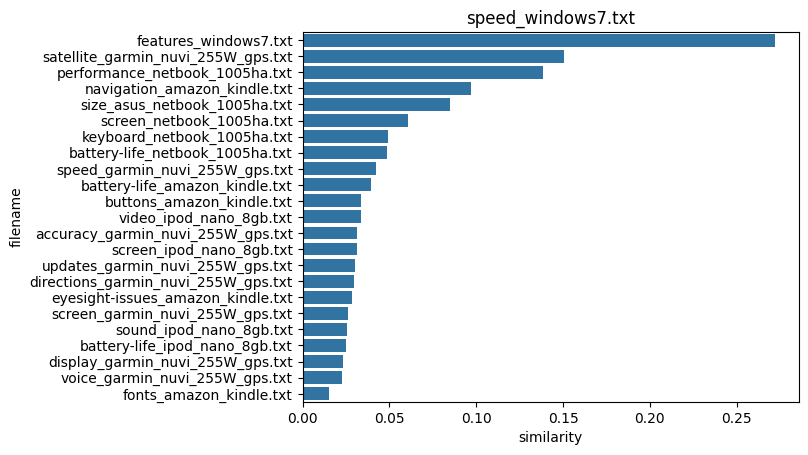

In [97]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sorted_index = similarity_pair.argsort()[0, ::-1]
sorted_index = sorted_index[1:]

hotel_sorted_indexes = hotel_indexes[sorted_index]

hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename'].values
hotel_1_sim_df['similarity'] = hotel_1_sim_value

print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)
plt.show()

In [ ]:
# 한글 텍스트 처리 - 네이버 영화 평점 감상 분석

In [99]:
!pip install --upgrade pip
!pip install JPype1-1.3.0-cp310-cp310-win_amd64.whl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: JPype1-1.3.0-cp310-cp310-win_amd64.whl is not a supported wheel on this platform.


In [100]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [konlpy]


In [101]:
!pip install konlpy

In [104]:
from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv("/content/drive/MyDrive/Euron/Data/ratings_train.txt", sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
print(train_df['label'].value_counts())

label
0    75173
1    74827
Name: count, dtype: int64


In [108]:
import re

train_df = train_df.fillna(' ')
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

test_df = pd.read_csv("/content/drive/MyDrive/Euron/Data/ratings_test.txt", sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [109]:
from konlpy.tag import Okt

okt = Okt()

def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1, 2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lg_clf = LogisticRegression(random_state=0, solver='liblinear')

params = {'C': [1, 3.5, 4.5, 5.5, 10]}

grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])

print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [112]:
from sklearn.metrics import accuracy_score

tfidf_matrix_test = tfidf_vect.transform(test_df['document'])
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86172
